In [1]:
#import necessary functions
from combined import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
#collect and organize data 
num_data_items = 8
starting_index = 100
increment_amount = 50
num_groupings = 6
groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=starting_index+i*increment_amount))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

True Positives: [88, 135, 182, 222, 273, 316]
False Negatives: [7, 7, 8, 16, 12, 16]
False Positives: [0, 0, 0, 0, 0, 0]
True Negatives: [5, 8, 10, 12, 15, 18]


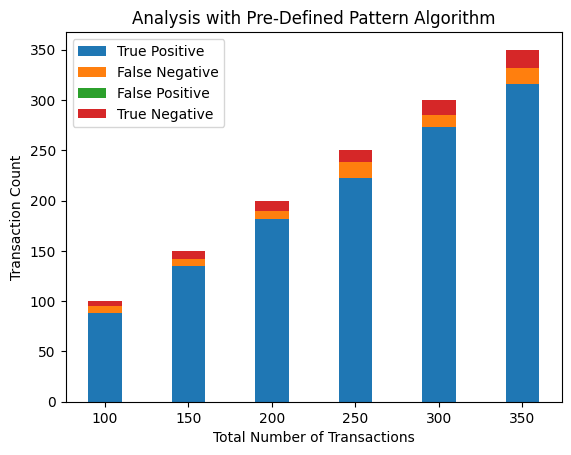

In [19]:
#graph the data for predefined patterns

df = pd.DataFrame(dict(
    True_Positive = predefined_good_nonflagged,
    False_Negative = predefined_good_flagged,
    False_Positive = predefined_bad_nonflagged,
    True_Negative = predefined_bad_flagged))

print(f"True Positives: {predefined_good_nonflagged}")
print(f"False Negatives: {predefined_good_flagged}")
print(f"False Positives: {predefined_bad_nonflagged}")
print(f"True Negatives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Transactions')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

True Positives: [76, 118, 138, 175, 209, 253]
False Negatives: [19, 24, 52, 63, 76, 79]
False Positives: [4, 5, 7, 6, 9, 14]
True Negatives: [1, 3, 3, 6, 6, 4]


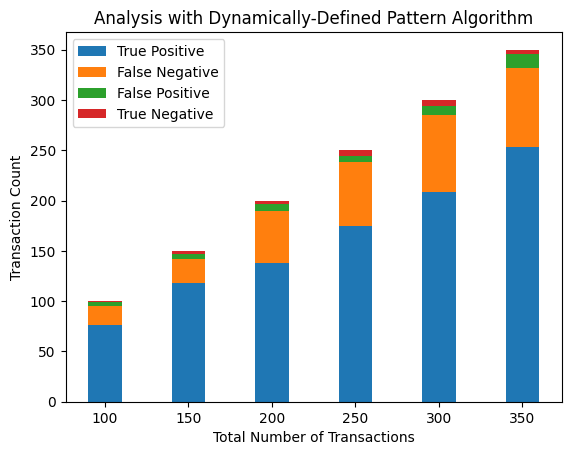

In [21]:
#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Positive = defined_good_nonflagged,
    False_Negative = defined_good_flagged,
    False_Positive = defined_bad_nonflagged,
    True_Negative = defined_bad_flagged))

print(f"True Positives: {defined_good_nonflagged}")
print(f"False Negatives: {defined_good_flagged}")
print(f"False Positives: {defined_bad_nonflagged}")
print(f"True Negatives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Transactions')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()


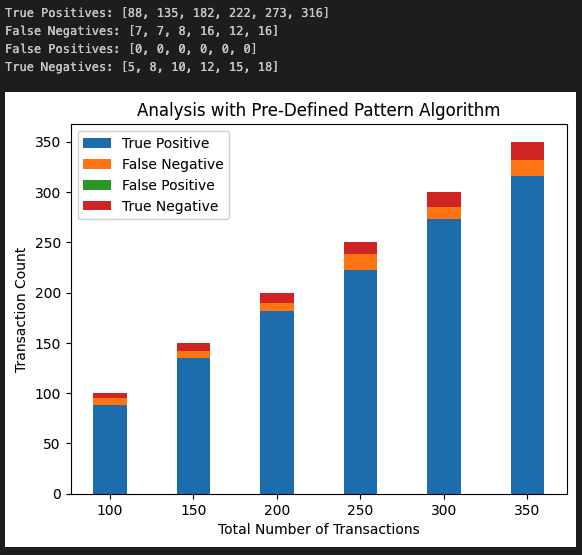 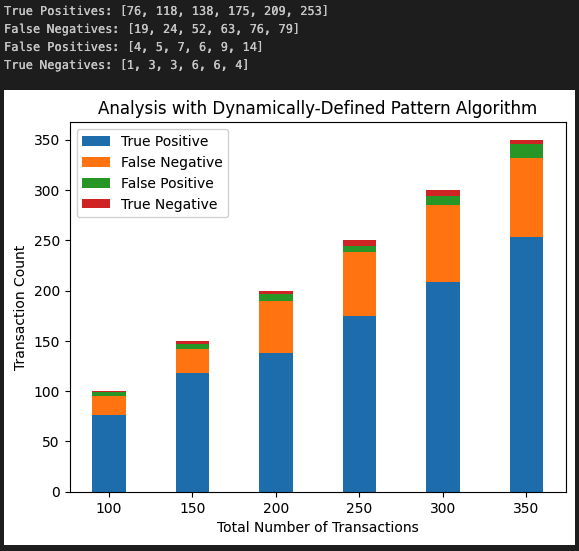

### Notes:
1. Num data items causes weird data for dynamically-defined pattern; not able to generate enough patterns